`Gradient Boosting` is an ensemble technique where several weak regression trees are combined to yield a powerful model <br>
`Early stopping` enables us to find the least number of iterations sufficient to build that generalises well on unseen data

In `Early Stopping` we specify a `validation_fraction` - denoting a fraction of the whole dataset. When each additional stage of regression tree is added, the validation set is used to score the model, and continue it till the score do not improve

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn import ensemble 
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import time 

In [2]:
data_list = [
    datasets.load_iris(return_X_y=True),
    datasets.make_classification(n_samples=800, random_state=0),
    datasets.make_hastie_10_2(n_samples=2000, random_state=0)
]
names = ["Iris Data", "Classification Data","Hastie Data"]

In [3]:
n_gb = []
score_gb = []
time_gb = []
n_gbes = []
score_gbes = []
time_gbes = []

n_estimators = 200

In [4]:
for X, y in data_list:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    #If the score don't improve by at 0.01 for the last 10 stages, stop additional stages 
    gbes = ensemble.GradientBoostingClassifier(
        n_estimators=n_estimators,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.01,
        random_state=0
    )
    gb = ensemble.GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    
    start = time.time()
    gb.fit(X_train, y_train)
    time_gb.append(time.time() - start)

    start = time.time()
    gbes.fit(X_train, y_train)
    time_gbes.append(time.time() - start)

    score_gb.append(gb.score(X_test, y_test))
    score_gbes.append(gbes.score(X_test, y_test))

    n_gb.append(gb.n_estimators)
    n_gbes.append(gbes.n_estimators)

First, comparing score with and without early stopping

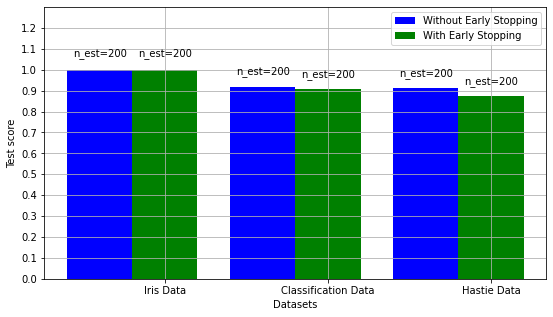

In [5]:
bar_width =0.2 
n = len(data_list)
index = np.arange(0, n * bar_width, bar_width) * 2.5
index = index[0:n]
plt.figure(figsize=(9,5))

bar_1 = plt.bar(index, score_gb, bar_width, label="Without Early Stopping",color="blue")
bar_2 = plt.bar(index + bar_width, score_gbes, bar_width, label="With Early Stopping",color="green")

plt.xticks(index + bar_width, names)
plt.yticks(np.arange(0,1.3,0.1))

def autolabel(rects, n_estimators):
    """
    Attach a text label above each bar displaying n_estimators of each model
    """
    for i, rect in enumerate(rects):
        plt.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * rect.get_height(),
            "n_est=%d" % n_estimators[i],
            ha="center",
            va="bottom",
        )

autolabel(bar_1, n_gb)
autolabel(bar_2, n_gbes)

plt.ylim([0, 1.3])
plt.legend(loc="best")
plt.grid(True)

plt.xlabel("Datasets")
plt.ylabel("Test score")

plt.show()

Comparing model fitting time with and without early stopping

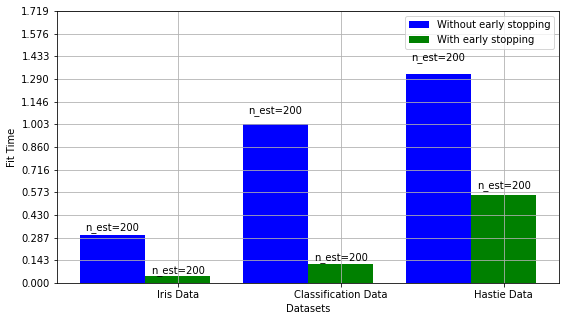

In [6]:
plt.figure(figsize=(9, 5))

bar1 = plt.bar(index, time_gb, bar_width, label="Without early stopping", color="blue")
bar2 = plt.bar(index + bar_width, time_gbes, bar_width, label="With early stopping", color="green")

max_y = np.amax(np.maximum(time_gb, time_gbes))

plt.xticks(index + bar_width, names)
plt.yticks(np.linspace(0, 1.3 * max_y, 13))

autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)

plt.ylim([0, 1.3 * max_y])
plt.legend(loc="best")
plt.grid(True)

plt.xlabel("Datasets")
plt.ylabel("Fit Time")

plt.show()